# kospi MDD 구하기  
| MDD : 최대 손식 낙폭  
| rolling(윈도우 값, [,min_period=1])[.집계함수] : 시리즈에서 윈도우 크기에 해당하는 개수만큼 데이터를 추출하여 집꼐함수에 해당하는 연산을 실행  
--- 
| 집계함수 : max(), min(), mean(),

[*********************100%***********************]  1 of 1 completed


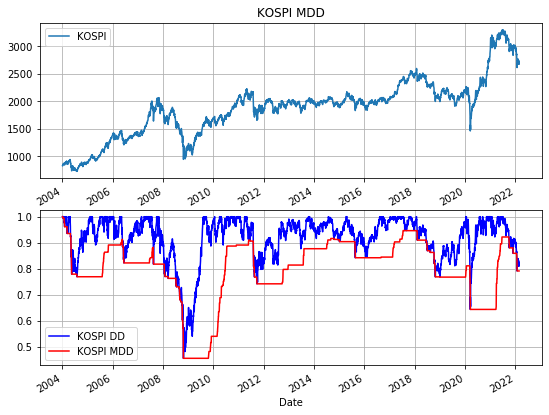

In [9]:
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt

yf.pdr_override()

kospi = pdr.get_data_yahoo('^KS11', '2004-01-04') # kospi symbol is ^KS11

window = 252 # 1년 동안 의 개장일
peak = kospi['Adj Close'].rolling(window, min_periods=1).max() # Adj Close => 종가 , 1년(min_preiod) 기간단위 최고치 peak를 구한다.
draw_down = kospi['Adj Close'] / peak # peal 대비 kospi 종가의 하락량을 구한다.
max_dd = draw_down.rolling(window, min_periods=1).min() # draw_down 에서 1년 기간 단위로 최저 max_dd 를 구한다.


# draw chart
plt.figure(figsize=(9,7))
# 2 x 1 - 1
plt.subplot(211) # 2행 1열 중 1행에 작도
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)

# 2 x 1 - 2
plt.subplot(212) # 2행 1열 중 2행에 작도
draw_down.plot(label='KOSPI DD', grid=True, legend=True, c='blue')
max_dd.plot(label='KOSPI MDD', grid=True, legend=True, c='red')

plt.show()